In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv(r"/content/Iris.csv")

In [66]:
print(df.head(10))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
5   6            5.4           3.9            1.7           0.4  Iris-setosa
6   7            4.6           3.4            1.4           0.3  Iris-setosa
7   8            5.0           3.4            1.5           0.2  Iris-setosa
8   9            4.4           2.9            1.4           0.2  Iris-setosa
9  10            4.9           3.1            1.5           0.1  Iris-setosa


In [68]:
#split missing values
features = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
target = df['Species']

In [69]:
features = features.fillna(features.mean())

In [88]:
#split data
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2,stratify=target, random_state=42
)

In [89]:
from numpy.random.mtrand import random
#train model
model = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=3,random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       random_state=42)

In [90]:
#make predictions
predictions = model.predict(X_test)

In [91]:
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions, average="macro")
rec = recall_score(y_test, predictions, average="macro")
f1 = f1_score(y_test, predictions, average="macro")
cm = confusion_matrix(y_test, predictions)

print("\n Accuracy: ",acc)
print("\n Precision : ",prec)
print("\n Recall: ",rec)
print("\n F1-Score:",f1)
print("Classification Report:\n", classification_report(y_test, predictions))
print("\n Confusion Matrix : ",cm)


 Accuracy:  0.9666666666666667

 Precision :  0.9696969696969697

 Recall:  0.9666666666666667

 F1-Score: 0.9665831244778612
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30


 Confusion Matrix :  [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


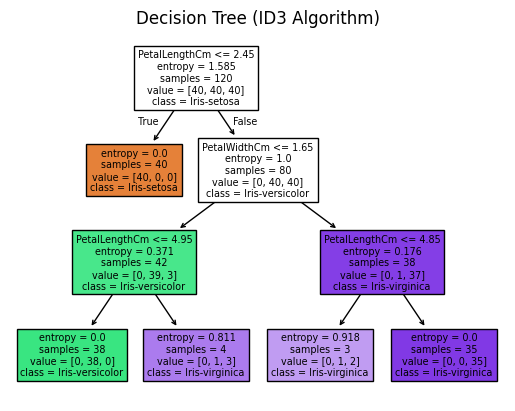

In [95]:
plt.figure()
plot_tree(model, feature_names=features.columns, class_names=model.classes_, filled=True)
plt.title("Decision Tree (ID3 Algorithm)")
plt.show()

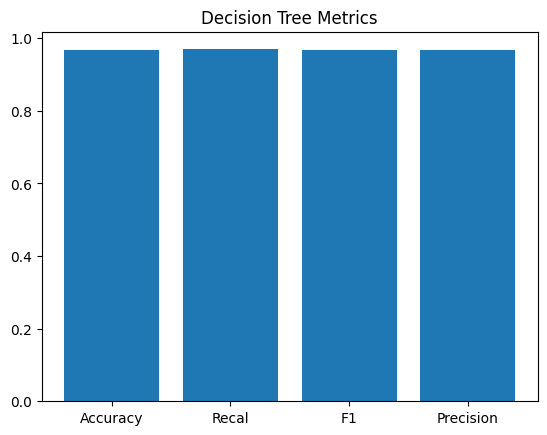

In [96]:
plt.bar(["Accuracy","Recal","F1","Precision"], [acc,prec,rec,f1])
plt.title("Decision Tree Metrics")
plt.show()